In [1]:
%autosave 0
from __future__ import print_function

Autosave disabled


# Example 2. calculate torsion angles (backbone and sugar puckering) #

Here we calculate torsion angles in a PDB or trajectory.   
Backbone torsion angles are calculated using the function

``` python
angles,res = bb.backbone_angles(pdb_file)
```
for PDB files. For trajectories, it is necessary to specify a topology file

``` python
angles,res = bb.backbone_angles(trajectory_file,topology=topology_file)
```
All trajectory formats accepted by MDTRAJ (e.g. pdb, xtc, trr, dcd, binpos, netcdf, mdcrd, prmtop) can be used.
Two objects are returned: *angles* and *res*. 
*angles* is an array with shape *n x m x 7*, where  
n = # number of frames  (n=1 in the example below)
m = # number of residues 
7 = number of torsion angles ($\alpha, \beta, \gamma, \delta, \epsilon, \zeta, \chi$).
Angles are expressed in radians and in the ($-\pi$,$\pi$) range. 

*res* is the name of the residues. The naming convention is
RESNAME_RESNUMBER_CHAININDEX, where RESNAME and RESNUMBER are as in the PDB/topology file and CHAININDEX is the index of the chain starting from zero, in the same order as it appears in the PDB/topology file. It is not possible to get the chain name.
Note that non-nucleic acids (proteins, water, ions) are ignored. Modified nucleotides are mapped to standard nucleotides if present in the *modified_dict* in the file *definitions.py*.

We start by calculating all backbone angle in the structure of the UUCG tetraloop.



In [2]:
# import barnaba
import barnaba as bb
from barnaba import definitions

# calculate backbone angles
pdb_file="uucg2.pdb"
angles,res = bb.backbone_angles(pdb_file)

# print angles
header = "# Residue " + "".join(["%10s " % aa for aa in definitions.bb_angles])
print(header)
for j in range(angles.shape[1]):
    stri = "%10s" % res[j]
    for k in range(angles.shape[2]):
        stri += "%10.3f " % angles[0,j,k]
    print(stri)


# Residue      alpha       beta      gamma      delta        eps       zeta        chi 
  C_1448_0       nan     -2.912      0.746      1.502     -2.421     -1.251     -3.006 
  C_1449_0    -1.126      2.961      0.970      1.397     -2.559     -1.016     -2.945 
  U_1450_0    -1.304      3.092      1.087      1.368     -2.704     -1.706     -2.823 
  U_1451_0    -2.766      2.523      0.898      2.472     -1.755     -1.290     -2.889 
  C_1452_0    -2.632     -2.658      2.179      2.443     -1.498      2.513     -2.407 
  G_1453_0    -0.759     -1.666     -2.560      1.493     -2.551     -1.055      0.711 
  G_1454_0     2.459     -2.238     -3.131      1.469     -2.495     -1.258     -3.103 
  G_1455_0    -1.086      3.136      0.894      1.361        nan        nan     -2.904 


# Loading uucg2.pdb 


It is also possible to calculate single angles and residues by specifying a list of *angles* and *residues*. In the following example, we calculate $\chi$ angles in residues `U_4_0` and `G_6_0`.

In [3]:
traj = "../test/data/UUCG.xtc"
top = "../test/data/UUCG.pdb"
angles_s,res_s = bb.backbone_angles(traj,topology=top,\
                                     residues=["U_4_0","G_6_0"],angles=["chi"])
print(angles_s.shape)


(20001, 2, 1)


# Loading ../test/data/UUCG.xtc 


We now plot the angle distributions, setting the domain to (0,360) to make the plot a bit nicer.

Text(260,0,'high-anti')

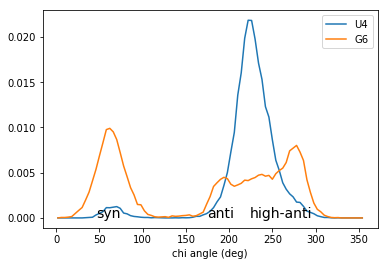

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# move from -pi,pi to 0-2pi range
aa = np.copy(angles_s)
aa[np.where(aa<0.0)] += 2.*np.pi

# from radians to deg
aa *= 180.0/np.pi

# create historgram 
bins = np.arange(0,360,4)
hh1,ee1 = np.histogram(aa[:,0,0],density=True,bins=bins)
hh2,ee2 = np.histogram(aa[:,1,0],density=True,bins=bins)

# make plot
plt.plot(0.5*(ee1[1:]+ee1[:-1]),hh1,label="U4")
plt.plot(0.5*(ee2[1:]+ee2[:-1]),hh2,label="G6")
plt.legend()
plt.xlabel("chi angle (deg)")
plt.text(60,0,"syn",fontsize=14,ha='center')
plt.text(190,0,"anti",fontsize=14,ha='center')
plt.text(260,0,"high-anti",fontsize=14,ha='center')

We can also calculate sugar torsion angles v0, v1, v2, v3 and v4 by calling the function
```python
angles, residues = bb.sugar_angles(traj,topology=top)
```


In [5]:

# calculate sugar angles for C_5. If angles is not specified, all 
# torsion angles in the sugar v0, v1, v2, v3, v4 are calculated

angles_s,rr = bb.sugar_angles(traj,topology=top, residues=["C_5_0"])
print(angles_s.shape)


(20001, 1, 5)


# Loading ../test/data/UUCG.xtc 


Text(0.5,0,'v (deg)')

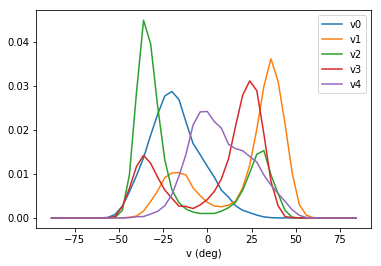

In [6]:
aa1 = np.copy(angles_s)

# from radians to deg
aa1 *= 180.0/np.pi

bins = np.arange(-90,90,4)
for j in range(5):
    hh,ee = np.histogram(aa1[:,0,j],density=True,bins=bins)
    # make plot
    plt.plot(0.5*(ee[1:]+ee[:-1]),hh,label="v%d"%j)
    
plt.legend()
plt.xlabel("v (deg)")

Amplitude and phase of the pucker is calculated by calling the function
```python
angles, residues = bb.pucker_angles(traj,topology=top)
```
again, a list of residues can be specified.

# Loading ../test/data/UUCG.xtc 


([], <a list of 0 Text yticklabel objects>)

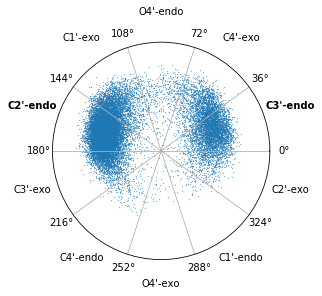

In [7]:

angles_p,rr = bb.pucker_angles(traj,topology=top, residues=["C_5_0"])

ax = plt.subplot(111, polar=True)
c = plt.scatter(angles_p[:,0,0], angles_p[:,0,1],s=0.05)
p3 = np.pi/5
plt.ylim(0,1.2)
xt = np.arange(0,2*np.pi,p3)
plt.text(0.5*p3,1.5,"C3'-endo",ha='center',fontweight='bold')
plt.text(1.5*p3,1.5,"C4'-exo",ha='center')
plt.text(2.5*p3,1.5,"O4'-endo",ha='center')
plt.text(3.5*p3,1.5,"C1'-exo",ha='center')
plt.text(4.5*p3,1.5,"C2'-endo",ha='center',fontweight='bold')
plt.text(5.5*p3,1.5,"C3'-exo",ha='center')
plt.text(6.5*p3,1.5,"C4'-endo",ha='center')
plt.text(7.5*p3,1.5,"O4'-exo",ha='center')
plt.text(8.5*p3,1.5,"C1'-endo",ha='center')
plt.text(9.5*p3,1.5,"C2'-exo",ha='center')
plt.xticks(xt)
plt.yticks([])
